In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv("./datasets/time-series_1m_from_20210101_to_20211201.csv")

In [3]:
df.head()

,open_time,open,high,low,close,volume
0,2021-01-01 00:00:00,28921.5,28961.5,28921.5,28961.5,9.183402e+05
1,2021-01-01 00:01:00,28961.5,29008.0,28961.5,29008.0,1.028218e+06
2,2021-01-01 00:02:00,29008.0,29009.0,28984.0,28984.0,2.129165e+05
3,2021-01-01 00:03:00,28984.0,28984.5,28971.5,28980.5,2.430015e+05
4,2021-01-01 00:04:00,28980.5,28980.5,28980.0,28980.0,2.955960e+04


In [4]:
close_values = df["close"]

Text(0.5, 1.0, 'Histogram')

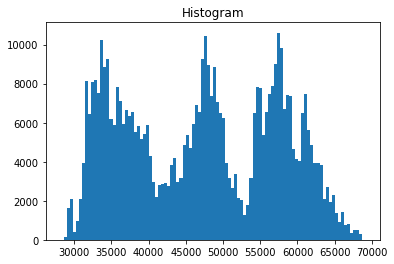

In [5]:
hist, bins = np.histogram(close_values, 100)
plt.hist(close_values, bins)
plt.title("Histogram")

## 1つ前の値との差

In [6]:
diff_close = close_values.diff().dropna()

Text(0.5, 1.0, 'Histogram')

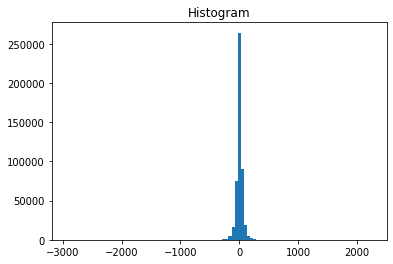

In [7]:
hist, bins = np.histogram(diff_close, 100)
plt.hist(diff_close, bins)
plt.title("Histogram")

In [8]:
diff_close_narrow = diff_close[(diff_close > -300) & (diff_close < 300)]

Text(0.5, 1.0, 'Histogram')

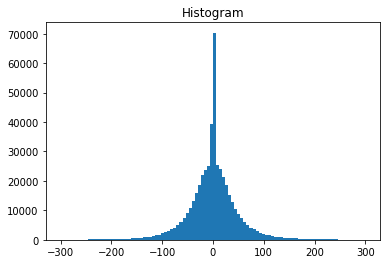

In [9]:
hist, bins = np.histogram(diff_close_narrow, 100)
plt.hist(diff_close_narrow, bins)
plt.title("Histogram")

In [10]:
# どちらも正規分布でない
rlt_diff_close = stats.shapiro(diff_close)
rlt_diff_close_narrow = stats.shapiro(diff_close_narrow)
print("p value (norm):", round(rlt_diff_close.pvalue, 5))
print("p value (norm):", round(rlt_diff_close_narrow.pvalue, 5))

p value (norm): 0.0
p value (norm): 0.0


/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 1つ前の値との変動率

In [11]:
close_pct_change = close_values.pct_change().dropna()

Text(0.5, 1.0, 'Histogram')

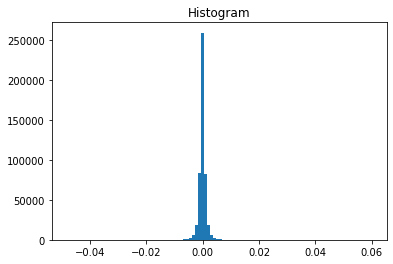

In [12]:
hist, bins = np.histogram(close_pct_change, 100)
plt.hist(close_pct_change, bins)
plt.title("Histogram")

In [13]:
close_pct_change_narrow = close_pct_change[
    (close_pct_change > -0.008) & (close_pct_change < 0.008)
]

Text(0.5, 1.0, 'Histogram')

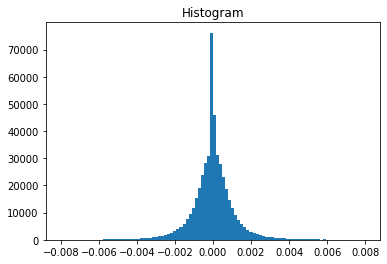

In [14]:
hist, bins = np.histogram(close_pct_change_narrow, 100)
plt.hist(close_pct_change_narrow, bins)
plt.title("Histogram")

In [15]:
# どちらも正規分布でない
rlt_close_pct_change = stats.shapiro(close_pct_change)
rlt_close_pct_change_narrow = stats.shapiro(close_pct_change_narrow)
print("p value (norm):", round(rlt_close_pct_change.pvalue, 5))
print("p value (norm):", round(rlt_close_pct_change_narrow.pvalue, 5))

p value (norm): 0.0
p value (norm): 0.0


## 変動率データがべき分布であるか確認

In [16]:
close_values_pct_change = close_values.pct_change().dropna()
power_dist = close_values_pct_change[
    (close_values_pct_change >= 0) & (close_values_pct_change <= 0.008)
]
hist, bins = np.histogram(power_dist, 100)
log_hist = [np.log(1) if x == 0 else np.log(x) for x in hist]

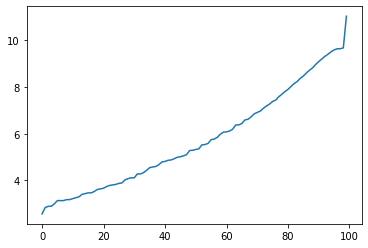

In [17]:
plt.plot(sorted(log_hist))